In [17]:
!pip install tensorflow keras scikit-learn tqdm mediapy

Defaulting to user installation because normal site-packages is not writeable


In [106]:
#Loading dataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import os
import pandas
import numpy as np

train_path = '/home/student/Downloads/brain tumour/Training'

images = []
labels = []

folder_names = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

label_value = 0

for folder_name in folder_names:
    for image in os.listdir(train_path+'/'+folder_name):
        img = load_img(train_path+f'/{folder_name}/'+image)
        img = img.resize((100, 100))
        img = img_to_array(img)
        images.append(img)

        labels.append(label_value)
        
    label_value = label_value + 1
    
images = np.array(images)
labels = np.array(labels)

Class 0


""

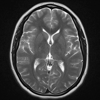

In [111]:
import random, mediapy, PIL

#Show preprocessed dataset
r = random.randint(0,len(images))

print('Class ' + str(labels[r]))
mediapy.show_image(array_to_img(images[r]))

In [112]:
#Train test split for testing
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.2)

#Train test split for validation
X_Train, xvalidation, Y_Train, yvalidation = train_test_split(images, labels, test_size=0.2)

In [113]:
#Color range extends to 255

xtrain =xtrain/255
xtest = xtest/255

In [114]:
xtrain[0].shape

(100, 100, 3)

In [115]:
import keras
import tensorflow as tf

cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [116]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [117]:
cnn.fit(xtrain, ytrain, epochs=10 , batch_size=16 , verbose=1 , validation_data=(xvalidation, yvalidation))

2023-10-23 14:22:18.890044: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 275520000 exceeds 10% of free system memory.


Epoch 1/10
144/144 [==============================] - 8s 54ms/step - loss: 1.1521 - accuracy: 0.4956 - val_loss: 182.2877 - val_accuracy: 0.2822
Epoch 2/10
144/144 [==============================] - 7s 51ms/step - loss: 0.7242 - accuracy: 0.6873 - val_loss: 347.8389 - val_accuracy: 0.3711
Epoch 3/10
144/144 [==============================] - 8s 54ms/step - loss: 0.5639 - accuracy: 0.7613 - val_loss: 472.0992 - val_accuracy: 0.1847
Epoch 4/10
144/144 [==============================] - 7s 52ms/step - loss: 0.4383 - accuracy: 0.8206 - val_loss: 633.1351 - val_accuracy: 0.2700
Epoch 5/10
144/144 [==============================] - 8s 54ms/step - loss: 0.3028 - accuracy: 0.8807 - val_loss: 1104.8638 - val_accuracy: 0.1341
Epoch 6/10
144/144 [==============================] - 8s 52ms/step - loss: 0.2261 - accuracy: 0.9164 - val_loss: 579.8087 - val_accuracy: 0.2875
Epoch 7/10
144/144 [==============================] - 7s 51ms/step - loss: 0.1652 - accuracy: 0.9386 - val_loss: 791.6476 - val_a

In [118]:
cnn.evaluate(xtest, ytest)

18/18 [==============================] - 0s 17ms/step - loss: 0.6073 - accuracy: 0.8780


[0.6073227524757385, 0.8780487775802612]

447


""

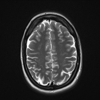

18/18 [==============================] - 0s 16ms/step
The predicted value is 0
no_tumor


In [127]:
#Predict

import random

r = random.randint(0, len(xtest))
print(r)
mediapy.show_image(xtest[r])

prediction = cnn.predict(xtest)
output = np.argmax(prediction[r])
print(f"The predicted value is {output}")
print(folder_names[output])

In [128]:
!pip install theano

Defaulting to user installation because normal site-packages is not writeable
